<a id='top'></a>

# SUMO chemical reactions


This notebook allows the user to:

+ Inspect all chemical reactions used in the SUMO code, for either:
    1. [2020 paper - Carbon monoxide formation and cooling in supernovae](https://www.aanda.org/articles/aa/abs/2020/10/aa38116-20/aa38116-20.html) 
    2. [2022 paper - The molecular chemistry of Type Ibc supernovae, and diagnostic potential with the James Webb Space Telescope](https://arxiv.org/abs/2203.07021). 
+ Inspect reactions with specific properties, for specific species. 



___

## Instructions


1. Go to the relevant cell, and click on it to enter edit mode. 
2. Customize the input parameters to desired values / uncomment code if necessary. 
3. Press "ctr + Enter". This will run only the hightlighted cell.

___

## Table of content

1. [List of all reactions](#all_reactions)
2. [Show specific reactions](#spec_reactions)
3. [Plot reaction rates](#plot_rates)



---

**Importing modules**

In [194]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
sns.set_context("talk")

%matplotlib inline

In [195]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 10;

<IPython.core.display.Javascript object>

[Top](#top)

---

# 1. All reactions

<a id='all_reactions'></a>
## 1.1 Pick the chemical network

Change the year to the year of the article of interest!

In [196]:
year = '2022'
fname = 'chem_network-%s.csv'%year


<a id='all_reactions'></a>
## 1.2 Overview of all reactions

The cell below shows all the currently included reactions

In [197]:
all_reactions = pd.read_csv(fname)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_reactions)

,Reaction type,Reactant 1,Reactant 2,Product 1,Product 2,Product 3,min temp,max temp,alpha,beta,gamma,Source1,Source2,Source3
0,Ion-Neutral,CII,CO2I,COI,COII,0,10,41000,1.100000e-09,0.000000,0.00000,umist12,slud18,cher09
1,Charge Exchange,CII,C2OI,CI,C2OII,0,10,41000,1.000000e-09,-0.500000,0.00000,umist12,-,-
2,Radiative Association,CII,OI,COII,0,0,10,13900,3.140000e-18,-0.150000,68.00000,umist12,slud18,cher09
3,Ion-Neutral,CII,O2I,COII,OI,0,10,41000,3.420000e-10,0.000000,0.00000,umist12,slud18,cher09
4,Ion-Neutral,CII,O2I,COI,OII,0,10,41000,4.540000e-10,0.000000,0.00000,umist12,slud18,cher09
5,Charge Exchange,CII,SI,CI,SII,0,10,4999,5.000000e-11,0.000000,0.00000,umist12,slud18,cher09
6,Charge Exchange,CII,SOI,CI,SOII,0,10,41000,2.600000e-10,-0.500000,0.00000,umist12,slud18,-
7,Ion-Neutral,CII,SOI,COII,SI,0,10,41000,2.600000e-10,-0.500000,0.00000,umist12,slud18,cher09
8,Ion-Neutral,CII,SOI,COI,SII,0,10,41000,2.600000e-10,-0.500000,0.00000,umist12,slud18,cher09
9,Charge Exchange,CII,SiI,CI,SiII,0,10,41000,2.100000e-09,0.000000,0.00000,umist12,slud18,cher09


## Notes on the sources

Several libraries were used to compile the network:

### Databases
1. umist12 - [UMIST Database for Astrochemistry](www.astrochemistry.net)
2. KIDA - [Online database](https://kida.astrochem-tools.org/)
3. NIST - [Chemical kinetic database](https://kinetics.nist.gov/kinetics/)

### Other scientific works
1. slud18 - [Sluder+ 2018]()
2. cher09 - [Cherchneff&Dwek 2009]()

Typically a specific reaction rate will show up in several of the mentioned databases, as they are compilation libraries  that often refear to each other. For info about the original source paper or work for a specific rate see the appendix in the [Liljegren+2020](https://www.aanda.org/articles/aa/abs/2020/10/aa38116-20/aa38116-20.html) or [Liljegren+2022](https://arxiv.org/abs/2203.07021), or search for the rate of interest in the above databases.

[Top](#top)

---

<a id='spec_reactions'></a>
## 2. Specific reactions

Find the ID no, temperature interval, the Arrhenius equation constants, and sources for a specific rates. 

Replace the reactant and product inputs to find specific reactions, as: 

```python
reactants = ['OI', 'CI']
products = ['COI']
```


`and_or` decideds the logic used; if you use `and_or = 'ALL'` then you pick out reactions that contains all the stated reactants and products, e.g. 
```python
reactants = ['OI', 'CI']
products = ['COI']

and_or = 'ALL'
```
will yield only the C+O->CO reactions, which is the only results with that particular combo or reactants/products.

`and_or = 'ANY'` will yield all reactions where any of the products matches the product input, and, similarly, any of the reactants matches the input reactants.



In [240]:
reactants = ['OI', 'CI']
products = ['COI']

and_or = 'ALL'



In [241]:
choice_index = []

for r in reactants:
    choice_index.append((all_reactions['Reactant 1']  == r) | (all_reactions['Reactant 2']  == r))

for p in products:
    choice_index.append((all_reactions['Product 1']  == p) | (all_reactions['Product 2']  == p)| (all_reactions['Product 3']  == p))
                 
choice_index2 = np.array(choice_index).transpose()

if and_or == 'ALL':
    choice_index2 = [all(c) for c in choice_index2]
elif and_or == 'ANY':
    choice_index2 = [any(c) for c in choice_index2]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_reactions[choice_index2])

,Reaction type,Reactant 1,Reactant 2,Product 1,Product 2,Product 3,min temp,max temp,alpha,beta,gamma,Source1,Source2,Source3
23,Radiative Association,CI,OI,COI,0,0,10,500,9.740000e-18,0.7050,0.0,from override file,NaN,NaN
24,Radiative Association,CI,OI,COI,0,0,500,4000,1.480000e-17,0.5410,0.0,from override file,NaN,NaN
25,Radiative Association,CI,OI,COI,0,0,4000,20000,1.100000e-16,-0.0105,0.0,from override file,NaN,NaN


[Top](#top)

---


<a id='plot_rates'></a>


## 3. Plot reaction rate

Some of the reaction rates depend on the temperature. 

The reaction rates are given by the modified Arrhenius form as

<img src="https://latex.codecogs.com/svg.latex?\Large&space;k(T)= \alpha \times \left(\frac{T}{300K}\right)^\beta \times \exp(-\gamma/T)" title="" />


To plot one or more rates use state their id and temperature interval
```python
rate_id = [0,1,2]
temperature_interval = [1000, 5000]
```

In [245]:
rate_id = [41, 42, 43]

min_temperature = 1000
max_temperature = 5000


In [246]:
def Arrhenius(T_range,r):
    a, b, c = r
    return a * (T_range / 300)**b * np.exp(-c/T_range)

,Reaction type,Reactant 1,Reactant 2,Product 1,Product 2,Product 3,min temp,max temp,alpha,beta,gamma,Source1,Source2,Source3
41,other,COI,O2I,CO2I,O2I,0,10,20000,4.200000e-12,0.0,24053.0,-,-,cher09
42,other,COI,SI,CI,SOI,0,10,20000,1.000000e-16,0.0,0.0,-,slud18,cher09
43,Neutral-Neutral,COI,SiI,CI,SiOI,0,2720,5190,1.300000e-09,0.0,34513.0,umist12,slud18,cher09


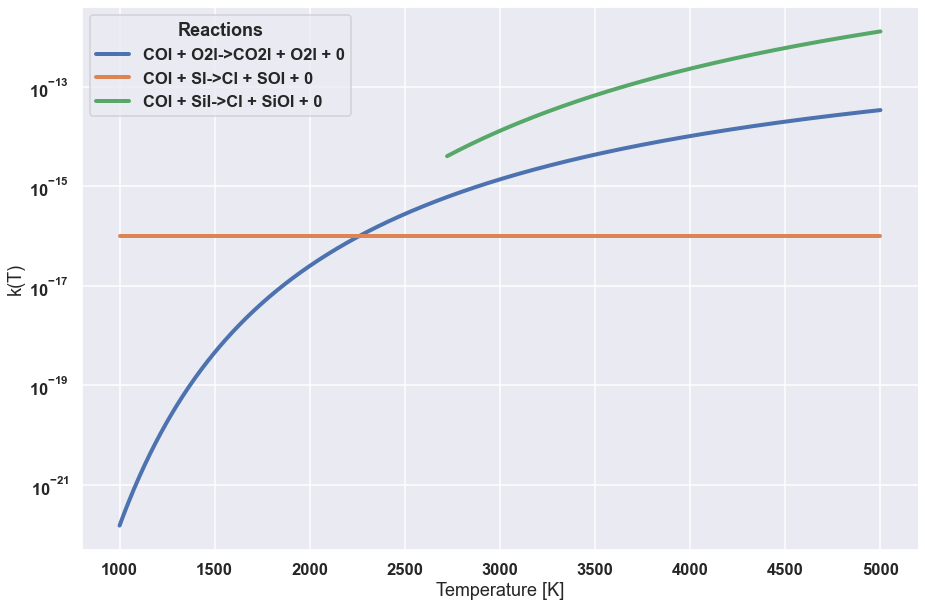

In [247]:
temperature_range = np.linspace(min_temperature, max_temperature, 1000)

all_reactions_small = all_reactions.iloc[rate_id]
all_reactions_small.iloc[0].alpha

plt.figure(figsize = (15, 10))

for index, a in all_reactions_small.iterrows():
    rate_consts = [a.alpha, a.beta, a.gamma]
    rate_consts = [float(r) for r in rate_consts]
    kT = Arrhenius(temperature_range, rate_consts)
    
    tmin = a['min temp']
    tmax = a['max temp']
        
    t_int = np.where((temperature_range > tmin) & (temperature_range < tmax))
    
    plot_x = temperature_range[t_int]
    plot_y = kT[t_int]
    
    reac_name = [a['Reactant 1'], a['Reactant 2']]
    react_name = ' + '.join(reac_name)
    
    prod_name = [a['Product 1'], a['Product 2'], a['Product 3']]
    if prod_name[2] == 0: prod_name = prod_name[:2]       
    prod_name = ' + '.join(prod_name)
    
    
    
    name = react_name + '->' + prod_name
    plt.plot(plot_x, plot_y, lw = 4, label = name)

plt.legend(title='Reactions', loc='best')

    
plt.yscale('log')
plt.ylabel('k(T)')
plt.xlabel('Temperature [K]')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_reactions_small)
